In [354]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [355]:
#Load Dataset
sdata=pd.read_csv('./healthcare-dataset-stroke-data.csv')
print(sdata.columns)
sdata.head()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [356]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
StrokeReport = pp.ProfileReport(sdata)
StrokeReport.to_file('StrokeReport.html')
display(IFrame('StrokeReport.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [357]:
# Drop columns 'id'

column_drop = ['id']
data1 = sdata.drop(columns = column_drop, axis = 1)
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


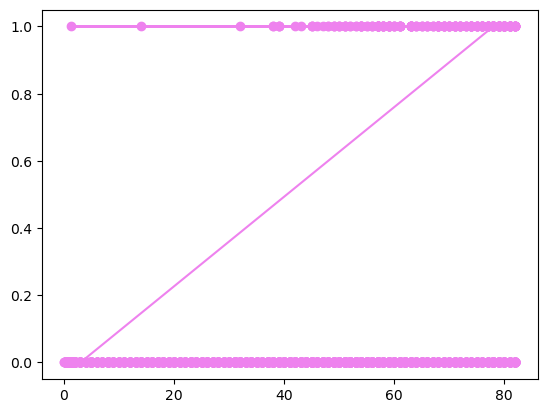

In [358]:
plt.plot(data1['age'], sdata['stroke'],marker='o', linestyle='-', color='violet', label='Stroke')

In [359]:
# find nulll values
data1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [360]:
# mean bmi when person has stroke

meanbmi_stroke_1 = data1[data1['stroke']==1]['bmi'].mean()
meanbmi_stroke_1

30.47129186602871

In [361]:
# mean bmi when person has NO stroke

meanbmi_stroke_0 = data1[data1['stroke'] == 0]['bmi'].mean()
meanbmi_stroke_0

28.824430729942552

In [362]:
#fill null values in 'bmi' column

data1.loc[data1['stroke']==1,'bmi'] = data1.loc[data1['stroke']==1,'bmi'].fillna(meanbmi_stroke_1)
data1.loc[data1['stroke']==0,'bmi'] = data1.loc[data1['stroke']==0,'bmi'].fillna(meanbmi_stroke_0)
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [363]:
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [364]:
data1[['stroke','age']].groupby(['stroke']).count()

,age
stroke,
0,4860
1,249


In [365]:
stroke_data = data1.copy()
stroke_1 = data1[data1['stroke']==1]
stroke_0 = data1[data1['stroke']==0]

# Visualization

# PIE CHART

In [380]:
# pie chart

def pie_plot(column_name):
    column_count = stroke_data[column_name].value_counts()
    
    plt.figure(figsize =(5,5))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightcoral'])
    plt.title(f' Pie chart of {column_name}')
    plt.axis('equal')
    
    plt.show()
    
# Compare pie charts for variables with and without stroke

import matplotlib.pyplot as plt

def pie_plot_compare(column_name):
    # Count the occurrences of each category in the 'column' for each group.
    no_stroke = stroke_0[column_name].value_counts()
    has_stroke = stroke_1[column_name].value_counts()
    #create labels
    labels_no_stroke = no_stroke.index.astype(str).tolist()
    labels_has_stroke = has_stroke.index.astype(str).tolist()
   
    # Create subplots for side-by-side pie charts.
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))

    # Plot the pie chart for 'No Stroke' group.
    axes[0].pie(no_stroke, labels=labels_no_stroke, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('No Stroke')

    # Plot the pie chart for 'Has Stroke' group.
    axes[1].pie(has_stroke, labels=labels_has_stroke, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Has Stroke')

    # Adjust layout and display the plot.
    plt.tight_layout()
    plt.show()


# Gender

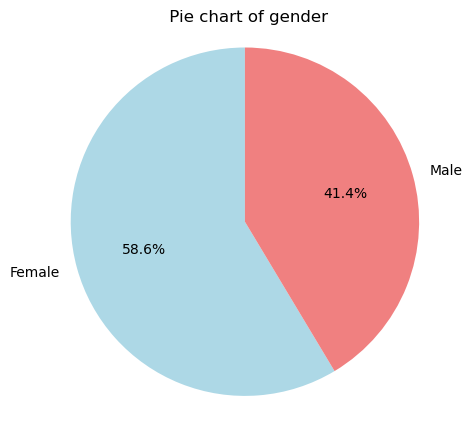

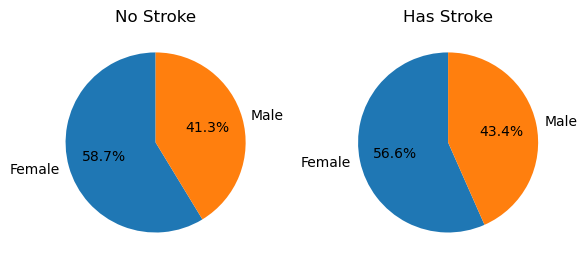

In [373]:
pie_plot("gender")
pie_plot_compare("gender")

# Stroke

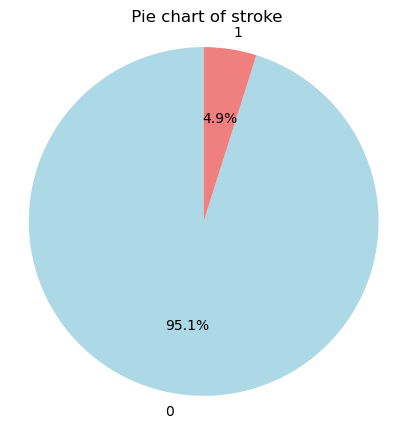

In [374]:
pie_plot('stroke')

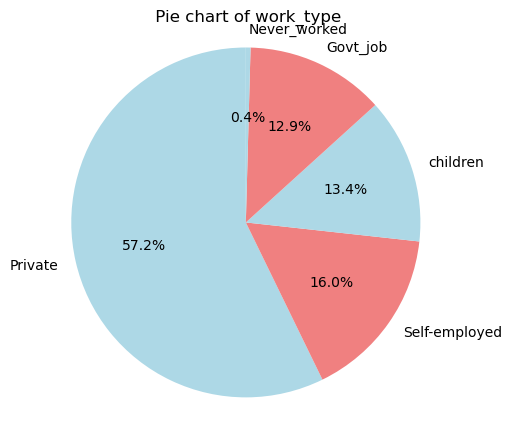

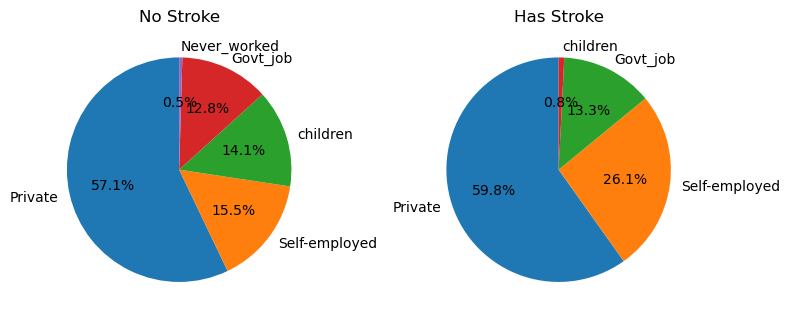

In [381]:
pie_plot("work_type")
pie_plot_compare("work_type")

# Histogram

In [263]:
# Histogram

def plot_hist(column_name, bins=6):
    column_count=[stroke_data[column_name]]
    plt.hist(column_count, bins=bins, color= 'magenta')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()
    
    
# Histogram to compare variables with and without stroke

def plot_hist_compare(column_name, bins=6):
    column_compare = [stroke_0[column_name], stroke_1[column_name]]
    plt.hist(column_compare, color = ['r','c'])
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['No Stroke', 'Has Stroke'])
    plt.show()

# Body Mass Index (BMI)

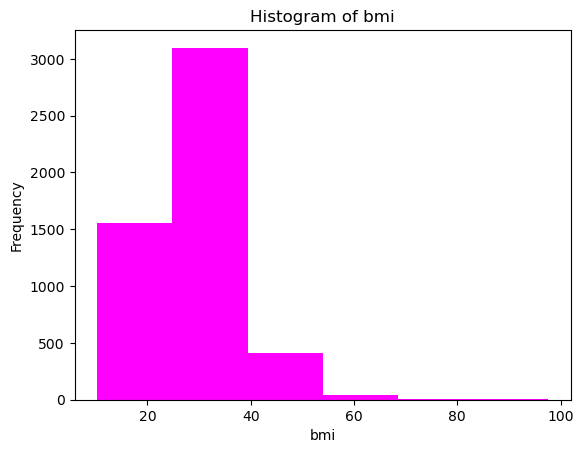

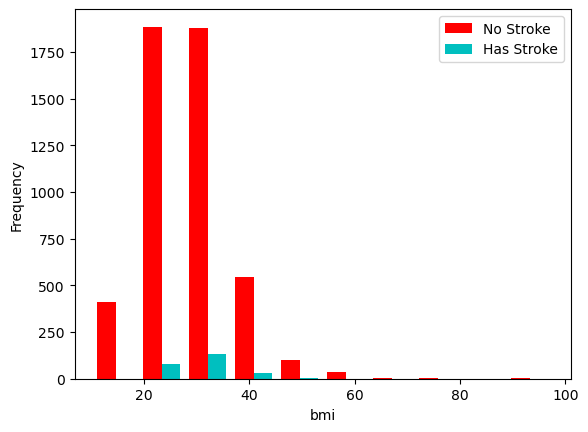

In [264]:
plot_hist('bmi')
plot_hist_compare('bmi')

# Age

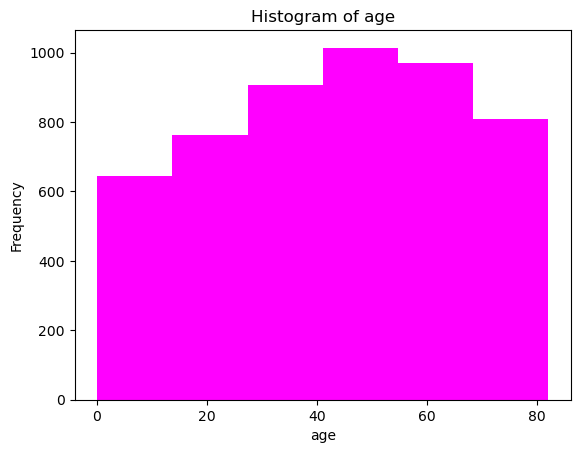

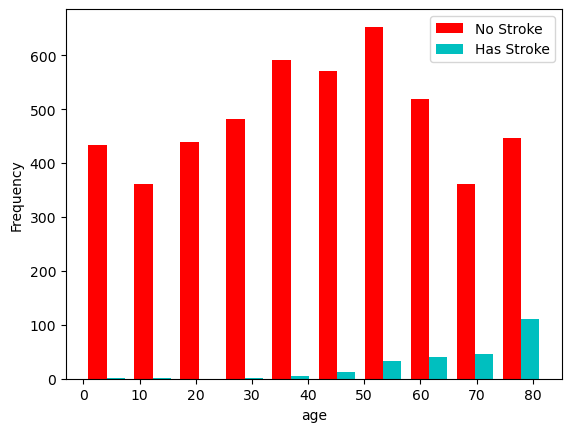

In [265]:
plot_hist('age')
plot_hist_compare('age')

# Hypertension

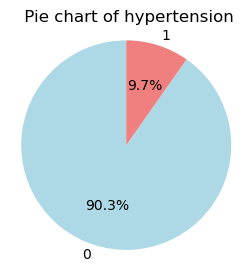

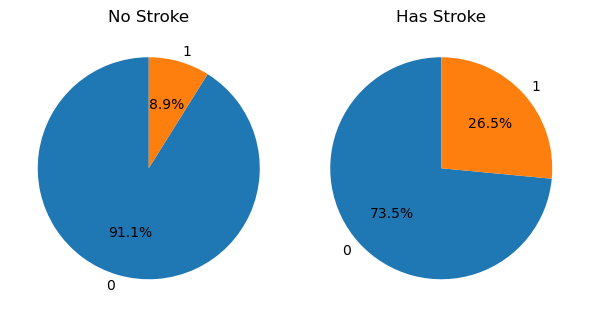

In [266]:
pie_plot('hypertension')
pie_plot_compare('hypertension')

# Heart disease

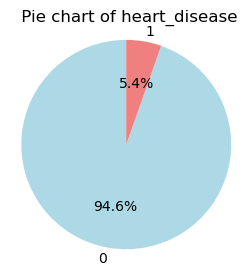

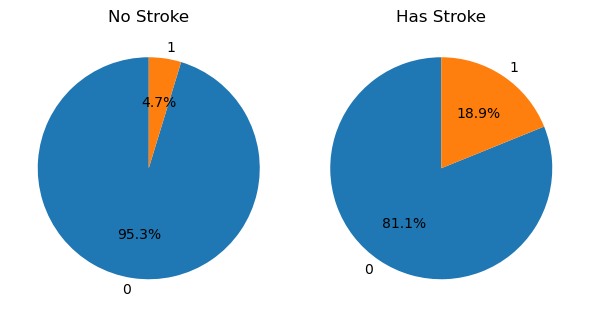

In [267]:
pie_plot('heart_disease')
pie_plot_compare('heart_disease')

# Marriage Status

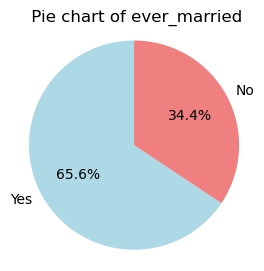

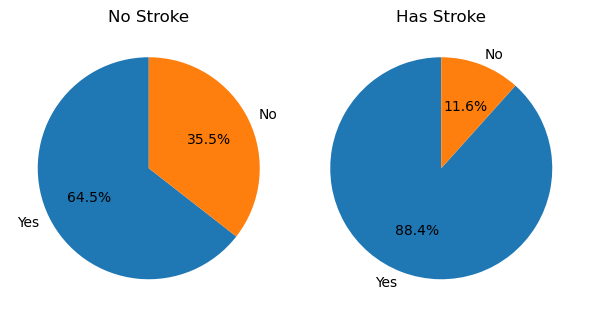

In [268]:
pie_plot('ever_married')
pie_plot_compare('ever_married')

# Residence Type	

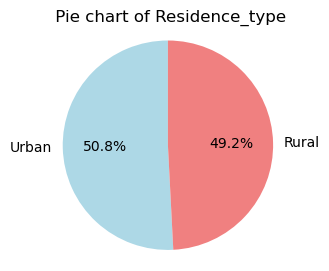

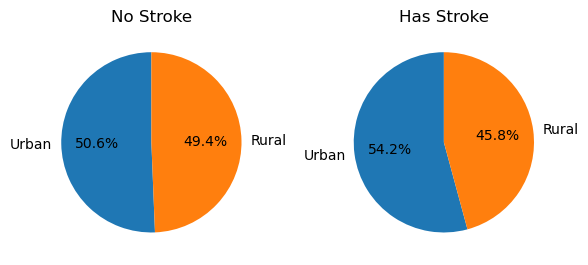

In [269]:
pie_plot('Residence_type')
pie_plot_compare('Residence_type')

# Average Glucose Level	

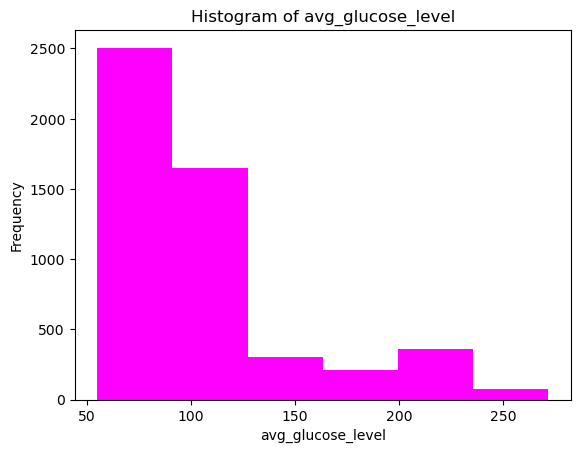

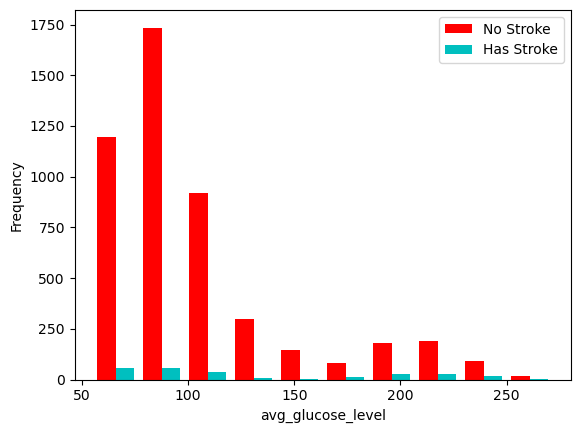

In [270]:
plot_hist('avg_glucose_level')
plot_hist_compare('avg_glucose_level')

# Smoking Status	

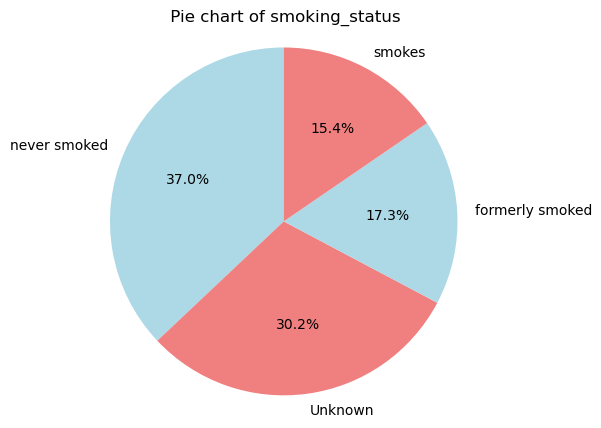

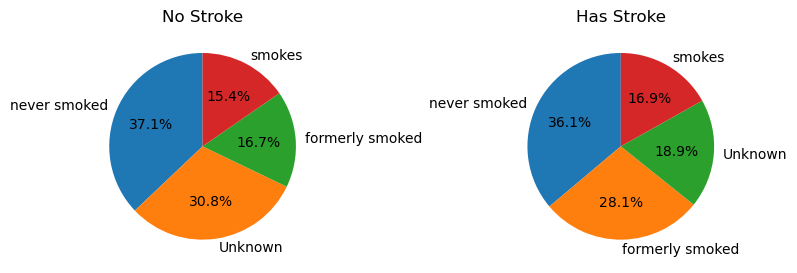

In [395]:
pie_plot('smoking_status')
pie_plot_compare('smoking_status')

In [272]:
30.8-18.9

11.900000000000002

# Box Plot - BMI


Median for no stroke is 28.3
Median for has stroke is 30.47129186602871


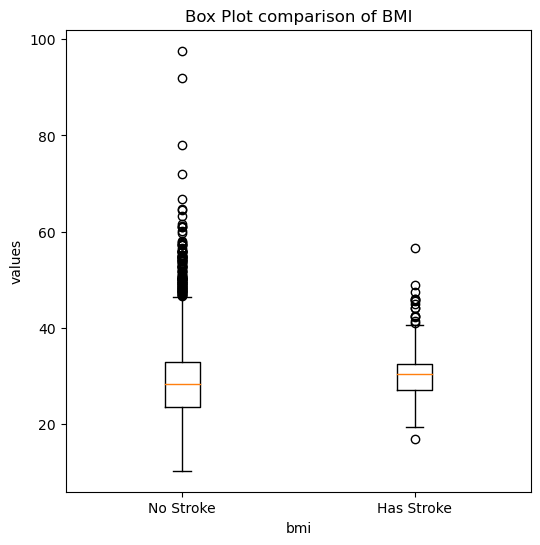

In [394]:
# Comparing boxplot of BMI

plt.figure(figsize=(6,6))
plt.boxplot([stroke_0['bmi'], stroke_1['bmi']])
plt.xticks([1, 2], ['No Stroke', 'Has Stroke'])
plt.title('Box Plot comparison of BMI')
plt.xlabel('bmi')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["bmi"]).median()}')
print(f'Median for has stroke is {(stroke_1["bmi"]).median()}')

# Box Plot - Average Glucose Level

Median for no stroke is 91.465
Median for has stroke is 105.22


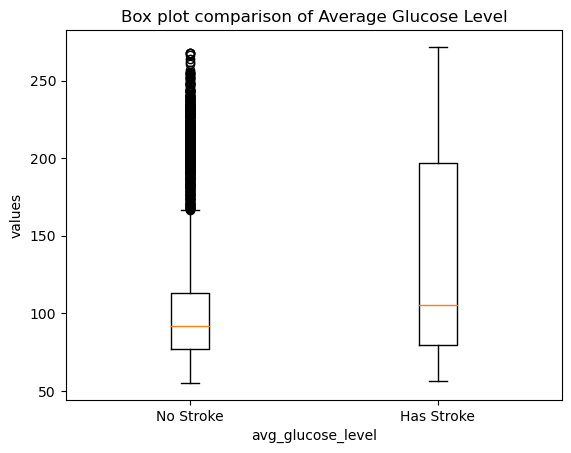

In [392]:
plt.boxplot([stroke_0['avg_glucose_level'], stroke_1['avg_glucose_level']])
plt.xticks([1,2], ['No Stroke', 'Has Stroke'])
plt.title('Box plot comparison of Average Glucose Level')
plt.xlabel('avg_glucose_level')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["avg_glucose_level"]).median()}')
print(f'Median for has stroke is {(stroke_1["avg_glucose_level"]).median()}')

# Box Plot - Age

Median for no stroke is 43.0
Median for has stroke is 71.0


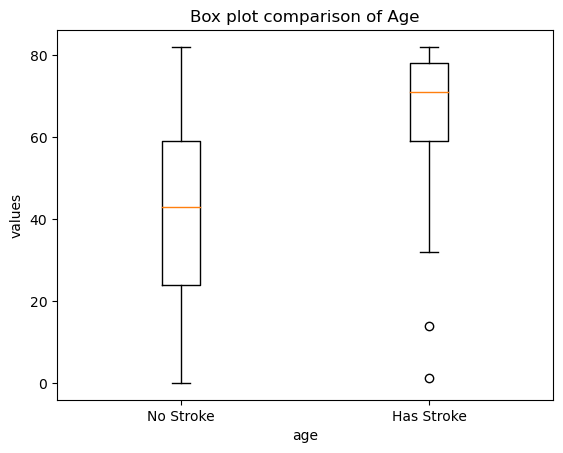

In [393]:
plt.boxplot([stroke_0['age'], stroke_1['age']])
plt.xticks([1,2], ['No Stroke', 'Has Stroke'])
plt.title('Box plot comparison of Age')
plt.xlabel('age')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["age"]).median()}')
print(f'Median for has stroke is {(stroke_1["age"]).median()}')

In [276]:
(stroke_0["age"]).median()

43.0

In [277]:
(stroke_1['age']).median()

71.0

# Data Visualization Result

| Parameter                 | No Stroke | Has Stroke | Note                                                             |
|---------------------------|-----------|------------|------------------------------------------------------------------|
| gender                    |           |            | No Clear Difference                                              |
| age (Median)              | 43        | 71         | The median age of stroke patients is higher than patients with no stroke |
| hypertension              |           |            | Patients with hypertension has 17.6% higher risk of getting stroke|
| heart_disease             |           |            | Patients who has heart disease has 14.2% higher risk of stroke|
| ever_married              |           |            | Patients who were married is 23.9% likely to get stroke thant those who don't|
| work_type                 |           |            | The patient who are self-employed are at 10.6% higher risk of having stroke|
| Residence_type (Most)     |           |            | No Clear Difference                                              |
| avg_glucose_level (Median)| 91.5      | 105.2      | The median of avg_glucose_level from Stroke Patient is higher than the Patient with no Stroke |
| bmi (Median)              | 28.3      | 30.5       | The median of bmi from Stroke Patient is slightly higher than the patient with no Stroke |
| smoking_status (Most)     |           |            | The patient who smokes or formerly smoked has 12.9% likely to have stroke|


In [283]:
# Label Encoding 'gender', 'ever_married', 'Residence_type' , 'work_type'

from sklearn.preprocessing import LabelEncoder
#create label encoder
label_encoder = LabelEncoder()

#1 Apply LabelEncoding to "Gender" column
data1['gender'] = label_encoder.fit_transform(data1['gender'])

#2 Apply LabelEncoding to "ever_married" column
data1['ever_married'] = label_encoder.fit_transform(data1['ever_married'])

#3 Apply LabelEncoding to "Residence_type" column
data1['Residence_type'] = label_encoder.fit_transform(data1['Residence_type'])

#4 Apply LabelEncoding to "work_type" column
data1['work_type'] = label_encoder.fit_transform(data1['work_type'])

data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,3,0,202.21,30.471292,never smoked,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,never smoked,1


In [284]:
data1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [285]:
# Performing One-hot encoding in the 'smoking_status' column 
smoking_status_encoded = pd.get_dummies(data1['smoking_status'], prefix='smoking')

# Concatenate the encoded columns to the original DataFrame
data_encoded = pd.concat([data1, smoking_status_encoded], axis=1)

# Drop'smoking_status' column
data_encoded = data_encoded.drop(['smoking_status'], axis=1)

data_encoded.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,0,1,0,0
1,0,61.0,0,0,1,3,0,202.21,30.471292,1,0,0,1,0
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,0,0,1,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,1,0,0,0,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,0,0,1,0


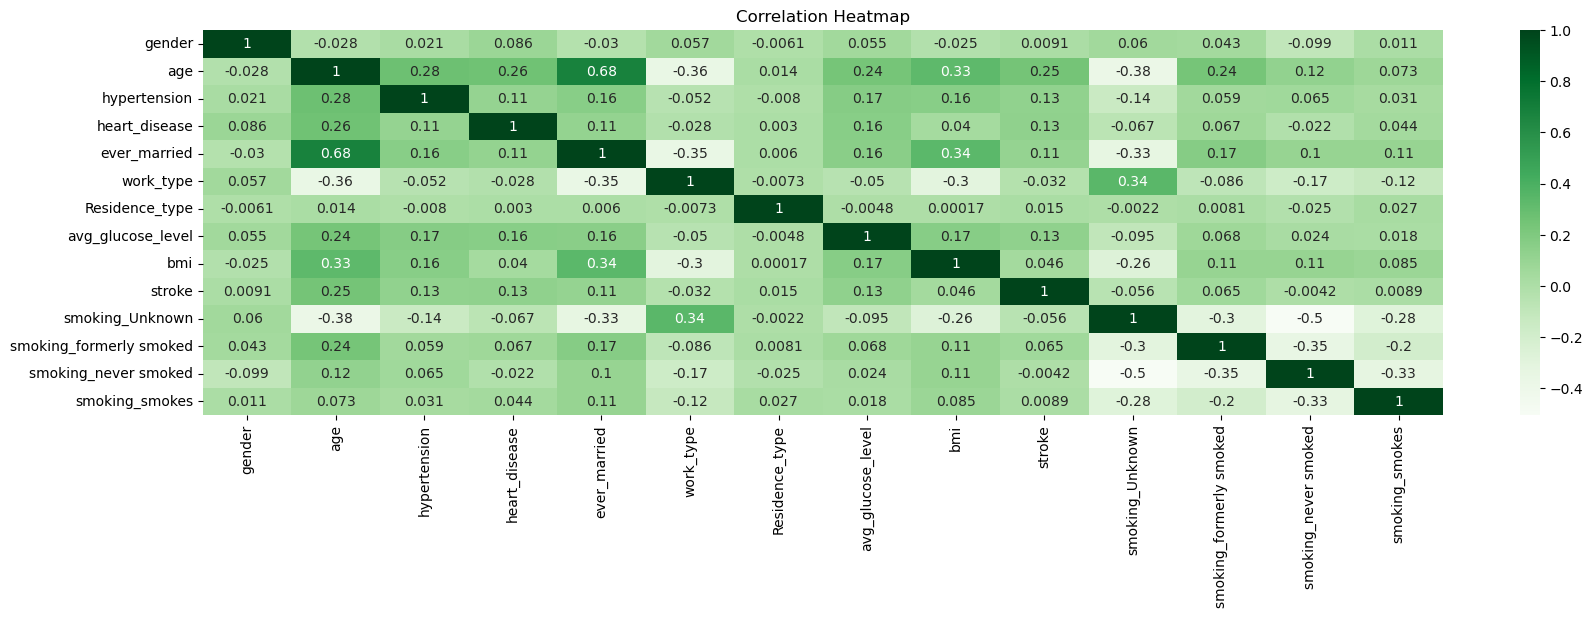

In [286]:
#Visualization of Correlations
fig = plt.figure(figsize=(20,5))
sns.heatmap(data_encoded.corr(),annot=True,cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

In [287]:
print(data_encoded.corr())

                           gender       age  hypertension  heart_disease  \
gender                   1.000000 -0.027752      0.021223       0.085685   
age                     -0.027752  1.000000      0.276367       0.263777   
hypertension             0.021223  0.276367      1.000000       0.108292   
heart_disease            0.085685  0.263777      0.108292       1.000000   
ever_married            -0.030171  0.679084      0.164187       0.114601   
work_type                0.056576 -0.361686     -0.051772      -0.028031   
Residence_type          -0.006105  0.014031     -0.007980       0.003045   
avg_glucose_level        0.054722  0.238323      0.174540       0.161907   
bmi                     -0.025468  0.327488      0.160256       0.039581   
stroke                   0.009081  0.245239      0.127891       0.134905   
smoking_Unknown          0.059557 -0.378366     -0.141551      -0.066765   
smoking_formerly smoked  0.043121  0.237347      0.059022       0.066938   
smoking_neve

In [288]:
# Define x and y variables
x= data_encoded.drop('stroke', axis=1).to_numpy()
y = data_encoded['stroke'].to_numpy()

# Create training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# SVC and NB

In [289]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

classifiers = [('SVM', SVC(random_state=100)),
               ('Naive Bayes', GaussianNB())]

for name, method in classifiers:
    method.fit(x_train2, y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict, zero_division=1))


Estimator: SVM
[[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022


Estimator: Naive Bayes
[[869 103]
 [ 31  19]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.16      0.38      0.22        50

    accuracy                           0.87      1022
   macro avg       0.56      0.64      0.57      1022
weighted avg       0.93      0.87      0.89      1022



# Logistical Regression

In [295]:
#Script for Logistical Regression
from sklearn.linear_model import LogisticRegression

for name,method in [('Logistic Regression', LogisticRegression(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,zero_division=1))  


Estimator: Logistic Regression
[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



# Decision Tree

In [299]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict, zero_division=1))  


Estimator: DT
[[895  65]
 [ 60   2]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       960
           1       0.03      0.03      0.03        62

    accuracy                           0.88      1022
   macro avg       0.48      0.48      0.48      1022
weighted avg       0.88      0.88      0.88      1022



# Random Forest Classifier

In [304]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=100)
# Train the classifier on the training data
rf_classifier.fit(x_train2, y_train)
# Make predictions on the test data
rf_predictions = rf_classifier.predict(x_test2)
print('\nEstimator: {}'.format(name)) 
# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, zero_division=1))


Estimator: DT
Confusion Matrix:
[[960   0]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



# Additional Check

# Chi_2 Test

In [305]:
#Performing chi2 to test relationship between 'stroke' and 'smoking_status'
from scipy.stats import chi2_contingency

# Create a contingency table of 'stroke' and 'smoking_status'
contingency_table = pd.crosstab(sdata['stroke'], sdata['smoking_status'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 29.22572707549827
P-value: 2.0077041756108317e-06


# Cramer's V Test

In [306]:
#Performing Cramer's V test to quantify the strength of the association between two variables

import numpy as np

# Obtain the chi-square statistic from the chi-square test
chi2 = 29.147269191399264
# Total sample size
n = 5110
# Number of categories in 'smoking_status'
r = 4
# Number of categories in 'stroke' (binary variable)
c = 2
# Calculate Cramer's V
V = np.sqrt(chi2 / (n * (min(r, c) - 1)))

print("Cramer's V:", V)

Cramer's V: 0.07552460905995706


# SMOTE Test

In [307]:
#Perform SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,predict)) 
print(classification_report(y_test, y_pred, zero_division=1))

[[895  65]
 [ 60   2]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.77      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022



# GradientBoostingClassifier

In [308]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test,predict)) 
print(classification_report(y_test, y_pred,zero_division=1))

[[895  65]
 [ 60   2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       960
           1       0.75      0.15      0.24        62

    accuracy                           0.95      1022
   macro avg       0.85      0.57      0.61      1022
weighted avg       0.94      0.95      0.93      1022

